In [ ]:
# -*- coding: utf-8 -*-
# Indentation: Jupyter Notebook

'''
Deep learning model for Mnist
'''

__version__ = 1.0
__author__ = "Sourav Raj"
__author_email__ = "souravraj.iitbbs@gmail.com"


In [100]:
import tensorflow as tf

In [101]:
from tensorflow.examples.tutorials.mnist import input_data

In [102]:
mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz


In [103]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [104]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [105]:
type(mnist.train.images)

numpy.ndarray

In [106]:
mnist.train.images.shape

(55000, 784)

In [107]:
mnist.train.images[2].shape

(784,)

In [108]:
mnist.train.images[2].reshape(28,28)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

In [109]:
sample = mnist.train.images[2].reshape(28, 28)

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline

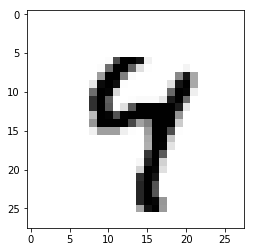

In [111]:
plt.imshow(sample, cmap='Greys' )

In [112]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [113]:
# network parameters
n_classes = 10 #0-9
n_input = 784 # 28*28
n_hidden_1 = 256
n_hidden_2 = 256
n_samples = mnist.train.num_examples

In [114]:
x = tf.placeholder('float', [None, n_input])
y = tf.placeholder('float', [None, n_classes])

In [115]:
def multilayer_perceptron(x, weights, biases):
    '''
    x: placeholder for data i/p
    weights: dict of weights
    biases: dict of bias values
    '''
    # first hidden layer with RELU activation
    # x*w +B
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # RELU(x*w + B) -> f(x) = max(o,x)
    layer_1 = tf.nn.relu(layer_1)
    
    # 2nd Hidden layer
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last output layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [116]:
weights= {
    'h1':tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
    
}

In [117]:
biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [118]:
pred = multilayer_perceptron(x, weights, biases)

In [119]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))


In [120]:
optimizer = tf.train.AdamOptimizer(learning_rate= learning_rate).minimize(cost)

In [121]:
init = tf.initialize_all_variables()

# Training model

In [122]:
mnist.train.next_batch(10)

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]))

In [123]:
t = mnist.train.next_batch(10)

In [124]:
len(t)

2

In [125]:
len(t[0])

10

In [126]:
len(t[1])

10

In [127]:
Xsamp, ysamp = mnist.train.next_batch(1)

In [128]:
Xsamp

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

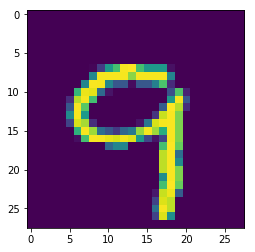

In [129]:
plt.imshow(Xsamp.reshape(28,28))

In [130]:
print(ysamp)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [131]:
ysamp[0][0]

0.0

# Run the Session

In [132]:
sess = tf.InteractiveSession()
sess.run(init)

In [133]:
# Launch the session
sess = tf.InteractiveSession()
sess.run(init)
for epoch in range(training_epochs):
    avg_cost = 0.0
    total_batch = int(n_samples/batch_size)
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
        avg_cost += c / total_batch
    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))
print("Model has completed {} Epochs of Training".format(training_epochs))

Epoch: 1 cost=140.9745
Epoch: 2 cost=37.9791
Epoch: 3 cost=23.7411
Epoch: 4 cost=16.5501
Epoch: 5 cost=12.0963
Epoch: 6 cost=9.0468
Epoch: 7 cost=6.6489
Epoch: 8 cost=5.2236
Epoch: 9 cost=3.9323
Epoch: 10 cost=2.8216
Epoch: 11 cost=2.1679
Epoch: 12 cost=1.6764
Epoch: 13 cost=1.3240
Epoch: 14 cost=0.9810
Epoch: 15 cost=0.8335
Model has completed 15 Epochs of Training


In [134]:
#15 loops
for epoch in range(training_epochs):
    # cost
    avg_cost = 0.0
    total_batch = int(n_samples/batch_size)
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, c= sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
        avg_cost += c/total_batch
    print("Epoch: {} Cost:{:.4f}".format(epoch+1, avg_cost))
print("model has completed {} Epochs of training".format(training_epochs))

Epoch: 1 Cost:0.7625
Epoch: 2 Cost:0.5611
Epoch: 3 Cost:0.6273
Epoch: 4 Cost:0.4971
Epoch: 5 Cost:0.4883
Epoch: 6 Cost:0.4793
Epoch: 7 Cost:0.4299
Epoch: 8 Cost:0.3430
Epoch: 9 Cost:0.4011
Epoch: 10 Cost:0.3403
Epoch: 11 Cost:0.2887
Epoch: 12 Cost:0.3119
Epoch: 13 Cost:0.2922
Epoch: 14 Cost:0.2810
Epoch: 15 Cost:0.3053
model has completed 15 Epochs of training


# Model Evaluations

In [135]:
correct_predictions = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))

In [136]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [137]:
correct_predictions = tf.cast(correct_predictions, 'float')

In [138]:
correct_predictions[0]

<tf.Tensor 'strided_slice_1:0' shape=() dtype=float32>

In [139]:
accuracy = tf.reduce_mean(correct_predictions)

In [140]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [141]:
mnist.test.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [142]:
mnist.test.images[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [143]:
accuracy.eval({x:mnist.test.images,y:mnist.test.labels})

0.95469999